In [ ]:
!pip install pybaseball


In [39]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import numpy as np

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Change in Strikeout Rate Over Time


In [ ]:
#Load in data from Retrosheet

#This data can be acquired here: https://www.retrosheet.org/gamelogs/index.html

#getting correct header for Retrosheet data

header = """date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info"""
head_list=header.split(',')

def_list=[]


#Getting data from 1914 to 2021 (Retrosheet's website says it has data for "well over half of the games in all seasons back to 1914")

for year in range(1914,2022):
  #I used Google drive to load in the data.
  df=pd.read_csv('/content/drive/My Drive/gl1871_2021/GL'+str(year)+'.TXT')
  df.set_axis(head_list, axis=1,inplace=True)
  df['date']=df['date'].astype(str)

  df['season']=df['date'].str[0:4]
  df=df[['season','date', 'number_of_game','v_name', 'v_league',
       'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score',
      'h_score', 'length_outs','v_at_bats', 'v_hits', 'v_doubles', 'v_triples',
       'v_homeruns', 'v_rbi', 'v_sacrifice_hits', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_caught_stealing', 'v_grounded_into_double',
       'v_first_catcher_interference', 'v_left_on_base', 'v_pitchers_used',
       'v_individual_earned_runs', 'v_team_earned_runs', 'v_wild_pitches',
       'v_balks', 'v_putouts', 'v_assists', 'v_errors', 'v_passed_balls',
       'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_doubles',
       'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
       'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing',
       'h_grounded_into_double', 'h_first_catcher_interference','h_putouts']]


  #calculating total plate appearances for home and away teams
  df['v_PA']=df['v_at_bats'] + df['v_walks'] + df['v_hit_by_pitch'] + df['v_sacrifice_flies'] + df['v_sacrifice_hits'] + df['v_first_catcher_interference']

  df['h_PA']=df['h_at_bats'] + df['h_walks'] + df['h_hit_by_pitch'] + df['h_sacrifice_flies'] + df['h_sacrifice_hits'] + df['h_first_catcher_interference']


  #aggregating by home and away team and merging dataframes
  away_df = df[['v_name','h_strikeouts','h_PA','h_score','v_putouts','h_at_bats', 'h_hits', 'h_doubles',
       'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks']]
  away_df = away_df.groupby(['v_name']).agg('sum')
  away_df['season'] = year
  


  home_df = df[['h_name','v_strikeouts', 'v_PA', 'v_score', 'h_putouts','v_at_bats', 'v_hits', 'v_doubles', 'v_triples',
       'v_homeruns', 'v_rbi', 'v_sacrifice_hits', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks']]
  home_df = home_df.groupby(['h_name']).agg('sum')
  merged_df=away_df.merge(home_df,right_index=True,left_index=True)

  #get team totals (adding home and away stats), strikeout rates and innings totals
  merged_df['Ks'] = merged_df['h_strikeouts']+merged_df['v_strikeouts']
  merged_df['TBF'] = merged_df['v_PA']+merged_df['h_PA']
  merged_df['RA'] = merged_df['v_score']+merged_df['h_score']
  merged_df['Outs'] = merged_df['v_putouts']+merged_df['h_putouts']
  merged_df['IP'] = merged_df['Outs']/3
  
  #calculate necessary stats
  merged_df['RA/9'] = round(merged_df['RA']/merged_df['IP']*9,2)
  merged_df['SO%'] = merged_df['Ks']/merged_df['TBF']
  merged_df['HR'] = merged_df['h_homeruns']+merged_df['v_homeruns']
  merged_df['H'] = merged_df['h_hits']+merged_df['v_hits']
  merged_df['BB'] = merged_df['h_walks']+merged_df['v_walks']
  merged_df['2B'] = merged_df['h_doubles']+merged_df['v_doubles']
  merged_df['3B'] = merged_df['h_triples']+merged_df['v_triples']
  merged_df['HBP'] = merged_df['h_hit_by_pitch']+merged_df['v_hit_by_pitch']
  merged_df['AB'] = merged_df['h_at_bats']+merged_df['v_at_bats']
  merged_df['SF'] = merged_df['h_sacrifice_flies']+merged_df['v_sacrifice_flies']
  merged_df['BB%'] = merged_df['BB']/merged_df['TBF']
  merged_df['BABIP'] = round((merged_df['H'] - merged_df['HR'])/(merged_df['AB'] - merged_df['Ks'] - merged_df['HR'] + merged_df['SF']),3)
  merged_df['BACON'] = round((merged_df['H'])/(merged_df['AB'] - merged_df['Ks'] + merged_df['SF']),3)
  merged_df['Extra-base Hits'] = merged_df['HR'] + merged_df['2B'] + merged_df['3B']
  merged_df["1B"] = merged_df['H'] - merged_df['Extra-base Hits']
  merged_df['Total Bases'] = merged_df['1B'] + merged_df['2B']*2 + merged_df['3B']*3 + merged_df['HR']*4
  merged_df['SLG'] = round(merged_df['Total Bases']/merged_df['AB'],3)
  merged_df['PF'] = round(merged_df['Total Bases']/merged_df['H'],2)
  merged_df['HR%'] = round(merged_df['HR']/merged_df['TBF'],3)
  merged_df['AVG'] = round(merged_df['H']/merged_df['AB'],3)
  merged_df['ISO'] = round(merged_df['SLG'] - merged_df['AVG'],3)
  
  
  
  merged_df['next_year'] = merged_df['season'] + 1










  
  def_list.append(merged_df)
  def_df=pd.concat(def_list)


In [44]:
#aggregate data on the season level and plot data
szn_df = def_df.groupby('season').agg({'Ks':'sum','TBF':'sum','IP':'sum','RA':'sum'})

szn_df['SO%'] = round(szn_df['Ks']/szn_df['TBF'],3)
szn_df['RA/9'] = round(szn_df['RA']/szn_df['IP']*9,2)


fig = px.line(szn_df, x=szn_df.index, y='SO%', title='American League/National League Strikeout Rate (1914 - 2021)',hover_data=['SO%'])

#fig.show()

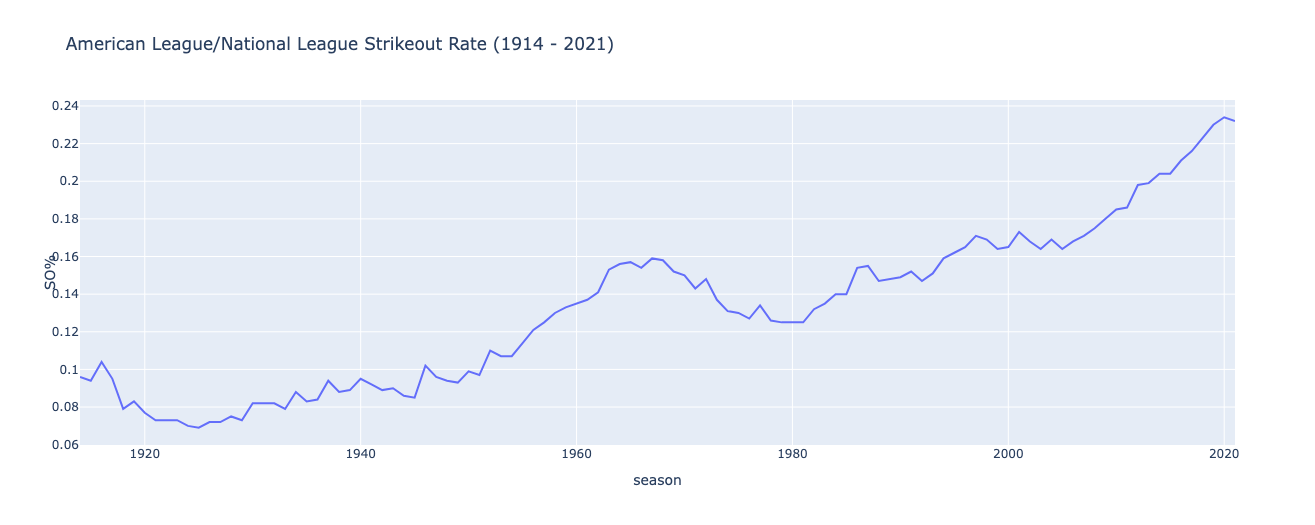

The MLB strikeout rate has dramatically inceased over time, rising from under 10% in 1914 to 23.2% in 2021. Since the 1930s, this rise has been generally consistent, save for a decline period during the 1970s (presumably in response to a series of rules changes intended to increase run scoring).

In [45]:
yr = szn_df.drop([1914])[['SO%']].reset_index()

prev = szn_df.drop([2021])[['SO%']].reset_index()
prev.rename(columns={'SO%':'last_year_SO%'},inplace=True)

year_to_year = pd.concat([yr,prev],axis=1)

year_to_year['Decline'] = year_to_year['SO%'] < year_to_year['last_year_SO%']

year_to_year['Decline'].value_counts()

False    68
True     39
Name: Decline, dtype: int64

In [46]:
consecutive_list=[]

for x in range(0,107):
  start = x
  end = x + 2
  consecutive_list.append((year_to_year['Decline'].iloc[start:end]*1).sum())


consec_df = pd.DataFrame(consecutive_list)

all_seasons = pd.DataFrame(consec_df.value_counts())



In [47]:
year_to_year.columns.values[2] = "last season"


In [48]:

since_80s = year_to_year[year_to_year['season'] > 1979]

since_80s['Decline'].value_counts()

False    34
True      8
Name: Decline, dtype: int64

In [49]:
consecutive_list=[]

for x in range(0,107):
  start = x
  end = x + 2
  consecutive_list.append((since_80s['Decline'].iloc[start:end]*1).sum())

after_79 = pd.DataFrame(pd.DataFrame(consecutive_list).value_counts())

since_80s_value = after_79[0].loc[2].values[0]

In [50]:
print("Since 1914, the strikeout rate has declined in consecutive seasons {} times.".format(all_seasons.loc[2].values[0][0]))
print("Since 1980, the strikeout rate has declined in consecutive season {} times.".format(since_80s_value))


Since 1914, the strikeout rate has declined in consecutive seasons 16 times.
Since 1980, the strikeout rate has declined in consecutive season 2 times.


In [75]:
#calculate percentage changes for runs allowed per 9 innings and strikeout rate

year1_runs=szn_df.iloc[0]['RA/9']
year1_SO=szn_df.iloc[0]['SO%']

szn_df['% Change in Runs per 9 innings']=round((szn_df['RA/9']/year1_runs)*100-100,1)
szn_df['% Change in Strikeout Rate']=round((szn_df['SO%']/year1_SO)*100-100,1)

fig = px.line(szn_df, x=szn_df.index, y=['% Change in Strikeout Rate','% Change in Runs per 9 innings'], title='AL/NL: Change in Runs Per 9 Inning and Strikeout Rate (1916 - 2021)',hover_data=['RA/9','SO%'])
fig.add_hline(y=0)
#fig.show()

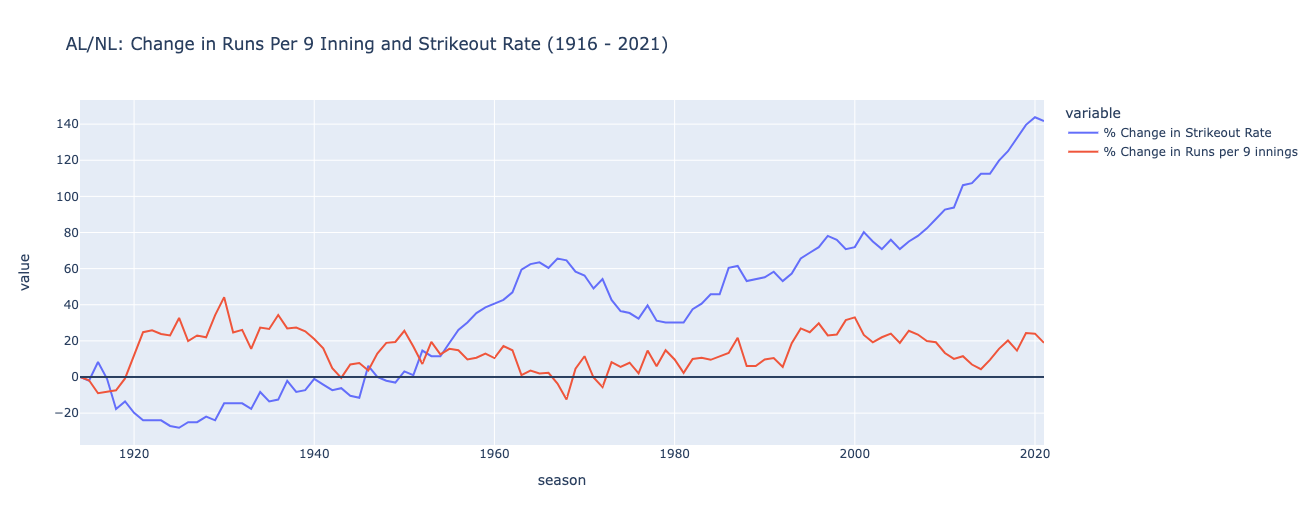

Despite the increase in strikeout rate, run scoring is also up since 1914. However, this increase has been both less consistent and less dramatic than the incease in strikeout rate.

There have been times when the increase in strikeouts have coincided with decreasing offense and vice versa (perhaps most notably in the 1960s). This result is intuitive, as we would expect a rise in an event that is good for defenses to coincide with a decline in offense.

However, at other times, the two rates have risen roughly in lockstop; this was the case in the period spanning from 1980 through the mid 1990s, as well as 2015 to 2019 (when the strikeout rate rose by about 13% from its 2014 level, while runs per nine innings also increased by over 19%).

Given this apparent inconsistency, a further examination of the relationship between strikeouts and run scoring/run prevention is warranted.

#2. The Impact of Strikeouts on Scoring 

In [52]:
szn_df['SO%'].corr(szn_df['RA/9'])

-0.06789861449818245

In [ ]:
#Calculate annual correlation between runs allowed per nine innings and the strikeout rate

correlation_list=[]
correlation_df=pd.DataFrame()
year_list=[]

for year in def_df['season'].unique():
  team_df = def_df[def_df['season']==year]
  team_df['SO%'] = team_df['Ks']/team_df['TBF']
  team_df['RA/9'] = team_df['RA']/team_df['IP']*9
  year_list.append(year)
  correlation_list.append(round(team_df['SO%'].corr(team_df['RA/9']),2))

correlation_df['Season']=year_list
correlation_df['r']=correlation_list

pitching_corr=correlation_df.copy()
pitching_corr.rename(columns={'r':'Pitching'},inplace=True)


In [54]:
correlation_df.describe()

,Season,r
count,108.00000,108.000000
mean,1967.50000,-0.508981
std,31.32092,0.185970
min,1914.00000,-0.870000
25%,1940.75000,-0.640000
50%,1967.50000,-0.520000
75%,1994.25000,-0.390000
max,2021.00000,0.030000


In [55]:
fig = px.line(correlation_df, x='Season', y='r', title='AL/NL Pitching: Team-level correlation between strikeout rate and runs allowed per nine innings')

#fig.show()

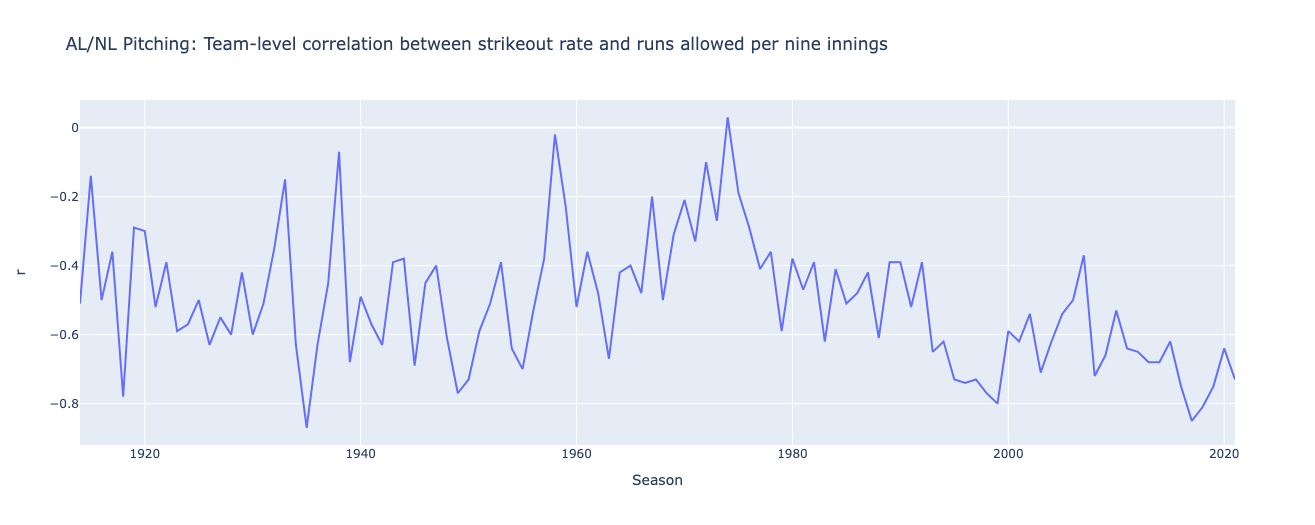

In [ ]:
#do the same, but for offense

header = """date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info"""
head_list=header.split(',')

off_list=[]


#Getting data from 1914 to 2021 (Retrosheet's website says it has data for "well over half of the games in all seasons back to 1914")

for year in range(1914,2022):
  df=pd.read_csv('/content/drive/My Drive/gl1871_2021/GL'+str(year)+'.TXT',header=None)
  df.set_axis(head_list, axis=1,inplace=True)
  df.columns[0:100]
  df['date']=df['date'].astype(str)

  df['season']=df['date'].str[0:4]
  df=df[['season','date', 'number_of_game','v_name', 'v_league',
       'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score',
      'h_score', 'length_outs','v_at_bats', 'v_hits', 'v_doubles', 'v_triples',
       'v_homeruns', 'v_rbi', 'v_sacrifice_hits', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks', 'v_intentional walks', 'v_strikeouts',
       'v_stolen_bases', 'v_caught_stealing', 'v_grounded_into_double',
       'v_first_catcher_interference', 'v_left_on_base', 'v_pitchers_used',
       'v_individual_earned_runs', 'v_team_earned_runs', 'v_wild_pitches',
       'v_balks', 'v_putouts', 'v_assists', 'v_errors', 'v_passed_balls',
       'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_doubles',
       'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
       'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing',
       'h_grounded_into_double', 'h_first_catcher_interference','h_putouts']]


  #calculating total plate appearances for home and away teams
  df['v_PA']=df['v_at_bats'] + df['v_walks'] + df['v_hit_by_pitch'] + df['v_sacrifice_flies'] + df['v_sacrifice_hits'] + df['v_first_catcher_interference']

  df['h_PA']=df['h_at_bats'] + df['h_walks'] + df['h_hit_by_pitch'] + df['h_sacrifice_flies'] + df['h_sacrifice_hits'] + df['h_first_catcher_interference']


  #aggregating by home and away team and merging dataframes
  home_df = df[['h_name','h_strikeouts','h_PA','h_score','v_putouts','h_at_bats', 'h_hits', 'h_doubles',
       'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks']]
  home_df = home_df.groupby(['h_name']).agg('sum')
  home_df['season'] = year
  


  away_df = df[['v_name','v_strikeouts', 'v_PA', 'v_score', 'h_putouts','v_at_bats', 'v_hits', 'v_doubles', 'v_triples',
       'v_homeruns', 'v_rbi', 'v_sacrifice_hits', 'v_sacrifice_flies',
       'v_hit_by_pitch', 'v_walks']]
  away_df = away_df.groupby(['v_name']).agg('sum')

  merged_df=away_df.merge(home_df,right_index=True,left_index=True)
  
  

  #get team totals, strikeout rates and innings totals
  merged_df['Ks'] = merged_df['h_strikeouts']+merged_df['v_strikeouts']
  merged_df['TBF'] = merged_df['v_PA']+merged_df['h_PA']
  merged_df['RS'] = merged_df['v_score']+merged_df['h_score']
  merged_df['Outs'] = merged_df['v_putouts']+merged_df['h_putouts']
  merged_df['IP'] = merged_df['Outs']/3
  merged_df['RS/9'] = round(merged_df['RS']/merged_df['IP']*9,2)
  

  #calculated stats
  merged_df['SO%'] = merged_df['Ks']/merged_df['TBF']
  merged_df['HR'] = merged_df['h_homeruns']+merged_df['v_homeruns']
  merged_df['H'] = merged_df['h_hits']+merged_df['v_hits']
  merged_df['BB'] = merged_df['h_walks']+merged_df['v_walks']
  merged_df['2B'] = merged_df['h_doubles']+merged_df['v_doubles']
  merged_df['3B'] = merged_df['h_triples']+merged_df['v_triples']
  merged_df['HBP'] = merged_df['h_hit_by_pitch']+merged_df['v_hit_by_pitch']
  merged_df['AB'] = merged_df['h_at_bats']+merged_df['v_at_bats']
  merged_df['SF'] = merged_df['h_sacrifice_flies']+merged_df['v_sacrifice_flies']
  merged_df['BB%'] = merged_df['BB']/merged_df['TBF']
  merged_df['BABIP'] = round((merged_df['H'] - merged_df['HR'])/(merged_df['AB'] - merged_df['Ks'] - merged_df['HR'] + merged_df['SF']),3)
  merged_df['BACON'] = round((merged_df['H'])/(merged_df['AB'] - merged_df['Ks'] + merged_df['SF']),3)
  merged_df['Extra-base Hits'] = merged_df['HR'] + merged_df['2B'] + merged_df['3B']
  merged_df["1B"] = merged_df['H'] - merged_df['Extra-base Hits']
  merged_df['Total Bases'] = merged_df['1B'] + merged_df['2B']*2 + merged_df['3B']*3 + merged_df['HR']*4
  merged_df['SLG'] = round(merged_df['Total Bases']/merged_df['AB'],3)
  merged_df['PF'] = round(merged_df['Total Bases']/merged_df['H'],2)
  merged_df['HR%'] = round(merged_df['HR']/merged_df['TBF'],3)
  merged_df['AVG'] = round(merged_df['H']/merged_df['AB'],3)
  merged_df['ISO'] = round(merged_df['SLG'] - merged_df['AVG'],3)
  
  
  merged_df['next_year'] = merged_df['season'] + 1




  off_list.append(merged_df)
  off_df=pd.concat(off_list)


In [ ]:
#annual correlation between runs scored per 9 innings and offensive strikeout rate

correlation_list=[]
correlation_df=pd.DataFrame()
year_list=[]

for year in off_df['season'].unique():
  team_df = off_df[off_df['season']==year]
  team_df['SO%'] = team_df['Ks']/team_df['TBF']
  team_df['RS/9'] = team_df['RS']/team_df['IP']*9
  year_list.append(year)
  correlation_list.append(round(team_df['SO%'].corr(team_df['RS/9']),2))


correlation_df['Season']=year_list
correlation_df['Hitting']=correlation_list;


In [ ]:
#plot annual correlation for offense (and defense/pitching for comparison)

fig = go.Figure()

fig.add_trace(go.Scatter(
    name='Pitching (SO% and R/9)',
    x=pitching_corr['Season'],
    y=pitching_corr['Pitching'],
    visible='legendonly'
))

fig.add_trace(go.Scatter(
    name='Hitting (SO% and R/G)',
    x=correlation_df['Season'],
    y=correlation_df['Hitting']
))



fig.update_layout(
    title='AL/NL: Correlation Between Strikeout Rate and Scoring (1916 - 2021)',
    yaxis_title="r",
    )




#fig.show()

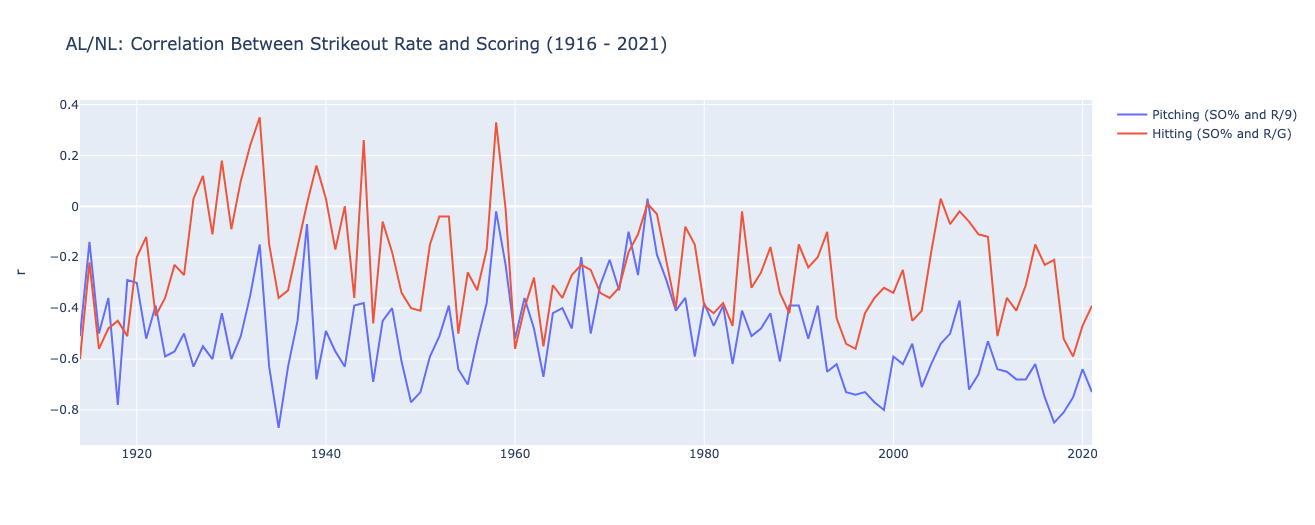

In [59]:
correlation_df.describe()

,Season,Hitting
count,108.00000,108.000000
mean,1967.50000,-0.238148
std,31.32092,0.208672
min,1914.00000,-0.600000
25%,1940.75000,-0.400000
50%,1967.50000,-0.255000
75%,1994.25000,-0.110000
max,2021.00000,0.350000


When looking at both hitting and pitching, the correlation coefficients generally seem to rise and fall in tanden, with the relationship being stronger for pitchers.

We can infer that strikeouts are very good pitchers and while they are bad outcomes for hitters, this is to a lesser degree.

#3. Why Are Things Different For Hitters and Pitchers?
Given these figures above, we can conclude that pitchers are incentivized to strike out batters, as an increase in strikeouts correlates with a decrease in runs allowed.

The incentive structure is less clear for hitters. While offenses that strikeout more do seem to score less (especially in today's modern, high-strikeout environment), the relationship is not as strong as it is on the pitching side.

Why is this?

## 3a. Distributions of Key Metrics

The follow charts examine the distributions of four different metrics, that broadly cover how a plate appearance can end.

*   Strikeout rate (SO%; did the batter strike out?)
*   Walk rate (BB%; did the batter walk?)
*   Batting average on contact (BACON; if the batter did not strikeout or walk, this ([almost alwys)](https://www.baseball-reference.com/bullpen/Catcher%27s_interference#:~:text=Catcher's%20interference%20is%20a%20specific,to%20hit%20a%20pitched%20ball.) means they made contact; did this contact result in a hit?)
*   Power Factor (PF, measured as total bases per hit; if the batter did get a hit, how many bases did they earn)





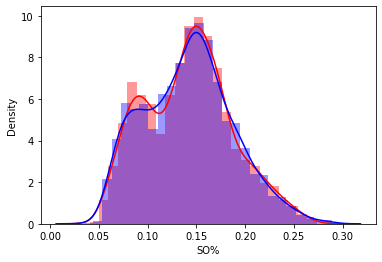

In [60]:
ax = sns.distplot(off_df['SO%'],color='red')

ax = sns.distplot(def_df['SO%'],color='blue')

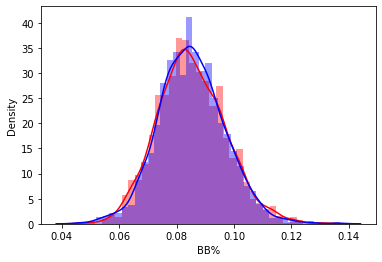

In [61]:
ax = sns.distplot(off_df['BB%'],color='red')

ax = sns.distplot(def_df['BB%'],color='blue')



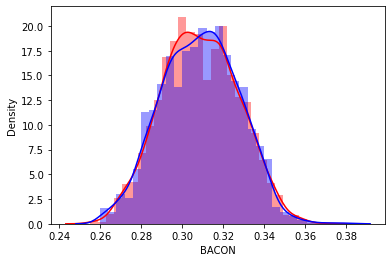

In [62]:
ax = sns.distplot(off_df['BACON'],color='red')

ax = sns.distplot(def_df['BACON'],color='blue')

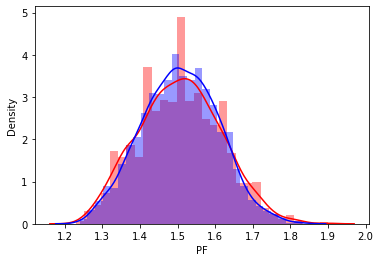

In [63]:
ax = sns.distplot(off_df['PF'],color='red')

ax = sns.distplot(def_df['PF'],color='blue')

The distributions of Power Factors seem to display the biggest difference between hitters and pitchers. Since these stats are on differing scales, we will use the coefficient of variation (standard deviation divided by mean) as a means of comparison.



In [ ]:
k_list=[]
bb_list=[]
p_correlation_df=pd.DataFrame()
year_list=[]
babip_list=[]
power_list=[]
run_list=[]


for year in def_df['season'].unique():
  team_df = def_df[def_df['season']==year]
  team_df['SO%'] = team_df['Ks']/team_df['TBF']
  team_df['BB%'] = team_df['BB']/team_df['TBF']
  team_df['BABIP'] = round((team_df['H'] - team_df['HR'])/(team_df['AB'] - team_df['Ks'] - team_df['HR'] + team_df['SF']),3)
  team_df["1B"] = team_df['H'] - team_df['Extra-base Hits']
  team_df['Total Bases'] = team_df['1B'] + team_df['2B']*2 + team_df['3B']*3 + team_df['HR']*4
  team_df['SLG'] = round(team_df['Total Bases']/team_df['AB'],3)
  team_df['PF'] = round(team_df['Total Bases']/team_df['H'],2)
  #team_df['RA/9'] = team_df['RA']/team_df['IP']*9
  year_list.append(year)
  k_list.append(team_df['SO%'].std()/team_df['SO%'].mean())
  bb_list.append(team_df['BB%'].std()/team_df['BB%'].mean())
  babip_list.append(team_df['BACON'].std()/team_df['BACON'].mean())
  power_list.append(team_df['PF'].std()/team_df['PF'].mean())
  run_list.append(team_df['RA/9'].std()/team_df['RA/9'].mean())



p_correlation_df['Season']=(year_list)
p_correlation_df['SO%']=(k_list)
p_correlation_df['BB%']=bb_list
p_correlation_df['BACON']=babip_list
p_correlation_df['PF']=power_list


In [ ]:
k_list=[]
bb_list=[]
h_correlation_df=pd.DataFrame()
year_list=[]
babip_list=[]
power_list=[]
run_list=[]



for year in off_df['season'].unique():
  team_df = off_df[off_df['season']==year]
  team_df['SO%'] = team_df['Ks']/team_df['TBF']
  team_df['BB%'] = team_df['BB']/team_df['TBF']
  team_df['BABIP'] = round((team_df['H'] - team_df['HR'])/(team_df['AB'] - team_df['Ks'] - team_df['HR'] + team_df['SF']),3)
  team_df["1B"] = team_df['H'] - team_df['Extra-base Hits']
  team_df['Total Bases'] = team_df['1B'] + team_df['2B']*2 + team_df['3B']*3 + team_df['HR']*4
  team_df['SLG'] = round(team_df['Total Bases']/team_df['AB'],3)
  team_df['PF'] = round(team_df['Total Bases']/team_df['H'],2)
  year_list.append(year)
  k_list.append(team_df['SO%'].std()/team_df['SO%'].mean())
  bb_list.append(team_df['BB%'].std()/team_df['BB%'].mean())
  babip_list.append(team_df['BACON'].std()/team_df['BACON'].mean())
  power_list.append(team_df['PF'].std()/team_df['PF'].mean())
  run_list.append(team_df['RS/9'].std()/team_df['RS/9'].mean())



h_correlation_df['Season']=year_list
h_correlation_df['SO%']=k_list
h_correlation_df['BB%']=bb_list
h_correlation_df['BACON']=babip_list
h_correlation_df['PF']=power_list




In [66]:
h_cov = pd.DataFrame(h_correlation_df.mean().drop('Season'))

h_cov.rename(columns = {0:'Hitters'},inplace=True)

p_cov = pd.DataFrame(p_correlation_df.mean().drop('Season'))

p_cov.rename(columns = {0:'Pitchers'},inplace=True)

cov_df = h_cov.merge(p_cov,right_index=True,left_index=True)



In [79]:
display(cov_df)

#cov_df.plot(kind='bar',ylabel='Coefficient of Variation');

fig = px.bar(cov_df, x=cov_df.index, y=["Pitchers","Hitters"], barmode='group')
fig.update_layout(
    yaxis_title="Coefficient of Variation")
#fig.show()

,Hitters,Pitchers
SO%,0.112882,0.123941
BB%,0.126176,0.122488
BACON,0.037375,0.038411
PF,0.040776,0.028595


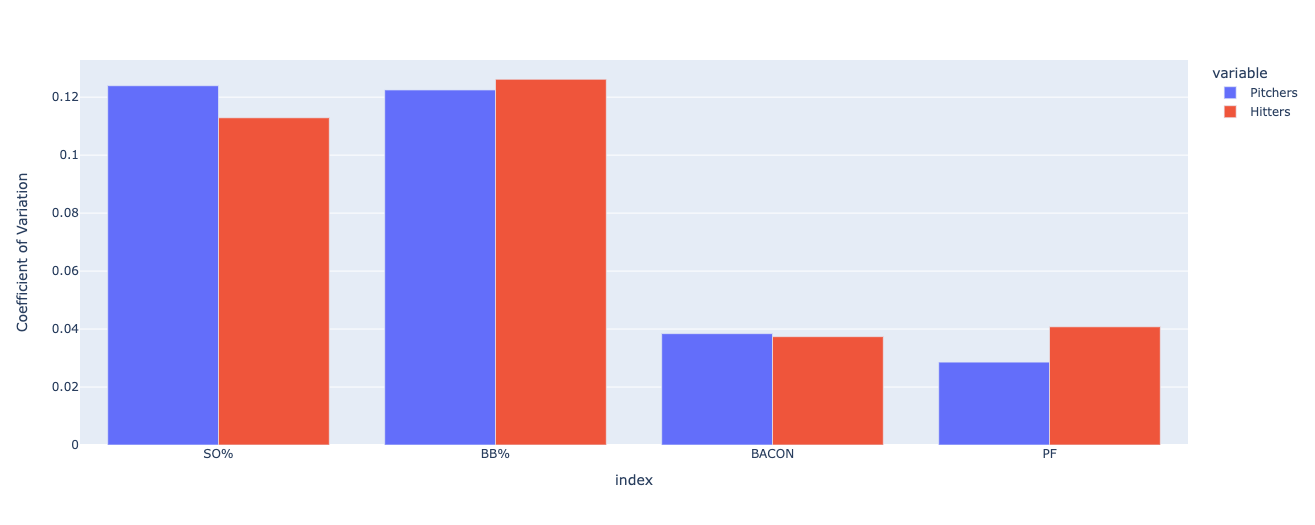

**As the charts show, there is slightly more variation in the strikeout rates for pitchers than for batters, on the team level. Team offense has more variation in terms of walk rate and considerably more variation in terms of power hitting.**

Therefore, team offenses are mored varied in terms of how they can score runs -- strikeout avoidance is one avenue but teams also have the ability to either put man on base by drawing walks and/or hit for more power.

As for team defenses, their results in terms of supressing walks and power is more homogenous, making strikeouts the most prominent area where they can influence run scoring.

These dynamics seem to explain why the correlation between strikeouts and scoring is stronger for team pitching staffs than team offenses.

##3b. Predictiveness

These findings also support the inference that **batters have more control over outcomes when they make contact.** This in turn implies the most sustainble means for pitching success is to prevent contact in the first place -- i.e. by striking batters out.

If this is in fact the case, for pitchers, we should expect the correlation between strikeout rates from one year to the next to be higher than the correlation between power factor from one year to the next.

We would also expect the year-to-year correlation for power factor to be higher for hitters than pitchers.

Since hitters and pitchers are not always on the same team from one year to the next, we will assess this year-to-year stability by looking at individual player statistics. 

We will look at all pitchers who had consecutive seasons in which they threw enough innings to qualify for the ERA title from 2016 to 2021, and then do the same for hitters who qualified for the batting title.


In [68]:
#pitchers

#it was more time-efficient to copy and paste data from Baseball-Reference.com into a CSV than to import five seasons of play-by-play data from Retrosheet

ind_pitch = pd.read_csv('/content/drive/My Drive/pitchers_16_21.csv').drop('Rk',axis=1)

ind_pitch = ind_pitch[ind_pitch['Name'].notna()]

ind_pitch['Name'] = ind_pitch['Name'].apply(lambda x: x.replace('*',''))

ind_pitch['SO%'] = ind_pitch['SO']/ind_pitch['PA']

ind_pitch['BB%'] = ind_pitch['BB']/ind_pitch['PA']

ind_pitch['PF'] = ind_pitch['SLG']/ind_pitch['BA']

ind_pitch['BACON'] = round((ind_pitch['H'])/(ind_pitch['AB'] - ind_pitch['SO'] + ind_pitch['SF']),3)

In [69]:
ind_pitch['next year'] = ind_pitch['Season'] + 1 


year_1_df = ind_pitch[['Name','Season','next year','SO%','BB%','PF','BACON','BAbip']]

year_2_df = ind_pitch[['Name','Season','SO%','BB%','PF','BACON','BAbip']]


two_year_df = year_1_df.merge(year_2_df,left_on=['Name','next year'], right_on=['Name','Season'])

two_year_df = two_year_df[['Name','Season_x','SO%_x','BB%_x','PF_x','BACON_x','BAbip_x','Season_y','SO%_y','BB%_y','PF_y','BACON_y','BAbip_y']]

two_year_df.rename(columns={'Season_x':'Season n','Season_y':'Season n+1'},inplace=True)

In [70]:
pitch_corr = two_year_df.corr()[['SO%_y','BB%_y','PF_y','BACON_y']].iloc[1:5]

pitch_corr

,SO%_y,BB%_y,PF_y,BACON_y
SO%_x,0.707041,-0.051656,0.238957,-0.117954
BB%_x,0.087621,0.529071,0.000854,-0.045928
PF_x,0.301966,0.062498,0.329333,-0.111409
BACON_x,0.011108,-0.014349,-0.084343,0.022730


In [71]:
from pybaseball import batting_stats

# for batters, we will use PyBaseball, which scrapes data from FanGraphs.com
ind_bat = batting_stats(2016,2021)


In [72]:
ind_bat['PF'] = ind_bat['SLG']/ind_bat['AVG']
ind_bat['BACON'] = round((ind_bat['H'])/(ind_bat['AB'] - ind_bat['SO'] + ind_bat['SF']),3)
ind_bat['next year'] = ind_bat['Season'] +1

year_1_df = ind_bat[['Name','Season','next year','K%','BB%','PF','BACON','BABIP']]
year_2_df = ind_bat[['Name','Season','K%','BB%','PF','BACON','BABIP']]

two_year_df = year_1_df.merge(year_2_df,left_on=['Name','next year'], right_on=['Name','Season'])

two_year_df = two_year_df[['Name','Season_x','K%_x','BB%_x','PF_x','BACON_x','BABIP_x','Season_y','K%_y','BB%_y','PF_y','BACON_y','BABIP_y']]

two_year_df.rename(columns={'Season_x':'Season n','Season_y':'Season n+1'},inplace=True)

In [73]:
bat_corr = two_year_df.corr()[['K%_y','BB%_y','PF_y','BACON_y']].iloc[1:5]

bat_corr

,K%_y,BB%_y,PF_y,BACON_y
K%_x,0.789350,0.145400,0.423463,0.251045
BB%_x,0.162621,0.744879,0.367065,0.094378
PF_x,0.441830,0.412675,0.677924,0.123697
BACON_x,0.243570,0.140994,0.111079,0.360892


In [80]:
stat_list = ['K%','BB%','PF','BACON']

pitch_stat_list = ['SO%','BB%','PF','BACON']

hit_cor_list = []
pitch_cor_list = []

for stat in stat_list:
  col = stat + '_y'
  row = stat + '_x'
  hit_cor_list.append(bat_corr[col].loc[row])


hit_cor = pd.DataFrame()
hit_cor['Stat'] = pitch_stat_list
hit_cor['Hitting'] = hit_cor_list

for stat in pitch_stat_list:
  col = stat + '_y'
  row = stat + '_x'
  pitch_cor_list.append(pitch_corr[col].loc[row])

def_cor = pd.DataFrame()
def_cor['Stat'] = pitch_stat_list
def_cor['Pitching'] = pitch_cor_list


df = hit_cor.merge(def_cor,on = 'Stat')


#df.plot(kind='bar',ylabel='r',title = "Correlation With Next Season's Results (2016 - 2021)");
fig = px.bar(df, x="Stat", y=["Pitching","Hitting"], title="Correlation With Next Season's Results (2016 - 2021)",barmode='group')
fig.update_layout(
    yaxis_title="r")
#fig.show()

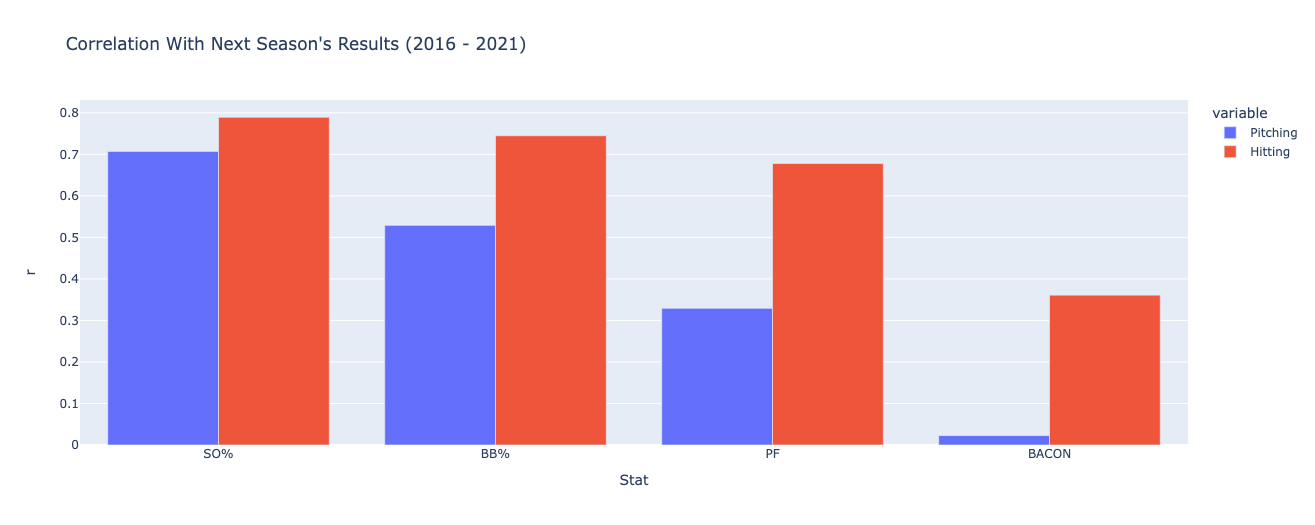

These findings support our conclusions. For pitchers, strikeout rate is the only metric with an r-squared value that is not below ~50%, supporting our inference that it is the aspect of the game pitchers have the most control over.

The correlation in terms of walk rate from year-to-year is moderately high, while in terms of Power Factor, it is weaker and for batting average, it is nearly zero.

For each of these metrics, the year-to-year correlation was higher for hitters. This is further support for the notion that offenses have multiple avenues for sustained success; based on these results, we would be more confident in a hitter sustaining a high Power Factor from one year to the next than a pitcher supressing opponent's power hitting.

These findings are generally in line with existing research, including that by [Russell Carleton and Derek Carty at *Baseball Prospectus*](https://www.baseballprospectus.com/fantasy/article/14215/resident-fantasy-genius-when-hitters-stats-stabilize/) and [Ben Clemens at FanGraphs](https://blogs.fangraphs.com/one-last-refresher-on-strikeouts-and-walks/).


# Conclusions

* The Major League Baseball strikeout rate has more than doubled over the past century, and, save for brief dips, it has risen consistently.

* That said, while the strikeout rate has increased by over 140% since 1914, scoring has also increased in this span (by 18%), even though strikeouts are a negative event for offenses.

* **Strikeouts are not good for hitters, obviously but they seem to hurt offenses to a lesser degree than they help pitchers.**

* This seems to stem from the fact that pitchers have a deal of control over strikeouts, but less control over things like turning balls in play into hits and supressing power hitting.

* Hitters' results are more consistent from one year to the next, and together, these findings support the idea that the hitter has more say over the results of batted balls.

* Since pitchers appear able to sustain high strikeout rates but have limited control over what happens once the ball is hit, pitchers' most reliable means of success seems to be preventing contact in the first place.

* **Teams should prioritize acquiring pitchers who are skilled at striking batters out, while they should not overlook batters who post high strikeout rates.**
 

# Sources



*   [Retrosheet](https://www.retrosheet.org/)
*   [Baseball Reference](https://www.baseball-reference.com/)
*   [FanGraphs](https://www.fangraphs.com/)
*   [PyBaseball](https://github.com/jldbc/pybaseball)










# Further Reading


*   [How can strikeouts be great for pitchers, but not that bad for hitters?](https://www.beyondtheboxscore.com/2013/4/1/4165664/how-can-strikeouts-be-great-for-pitchers-but-not-that-bad-for-hitters), James Gentile, *Beyond the Box Score*
*   [For Your Enjoyment, a Home Run Rate Refresher](https://blogs.fangraphs.com/for-your-enjoyment-a-home-run-rate-refresher/), Ben Clemens, *FanGraphs*
*   [One Last Refresher (On Strikeouts and Walks)](https://blogs.fangraphs.com/one-last-refresher-on-strikeouts-and-walks/), Ben Clemens, *FanGraphs*
*   [A Baseball’s Exit Velocity Is Five Parts Hitter, One Part Pitcher](https://fivethirtyeight.com/features/a-baseballs-exit-velocity-is-five-parts-hitter-one-part-pitcher/), Rob Arthur, *FiveThirtyEight*
*   [Resident Fantasy Genius: When Hitters’ Stats Stabilize](https://www.baseballprospectus.com/fantasy/article/14215/resident-fantasy-genius-when-hitters-stats-stabilize/), Derek Carty, *Baseball Prospectus*
*   [Resident Fantasy Genius: When Pitchers’ Stats Stabilize](https://www.baseballprospectus.com/fantasy/article/14293/resident-fantasy-genius-when-pitchers-stats-stabilize/), Derek Carty, *Baseball Prospectus*




